## Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

### Review the data

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Discover the data

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   transaction_date          414 non-null    float64
 1   house_age                 414 non-null    float64
 2   transit_distance          414 non-null    float64
 3   local_convenience_stores  414 non-null    int64  
 4   latitude                  414 non-null    float64
 5   longitude                 414 non-null    float64
 6   price_per_unit            414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB


In [147]:
data.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [148]:
data.isnull().any()

transaction_date            False
house_age                   False
transit_distance            False
local_convenience_stores    False
latitude                    False
longitude                   False
price_per_unit              False
dtype: bool

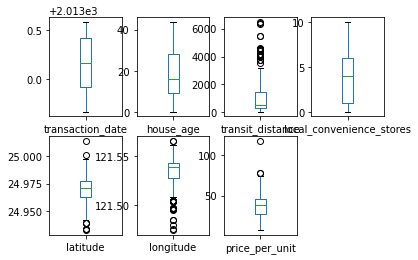

In [149]:
#Detect outliers
data.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False)
plt.show()

In [150]:
data=data[data['price_per_unit']<70]

array([[<AxesSubplot:title={'center':'transaction_date'}>,
        <AxesSubplot:title={'center':'house_age'}>,
        <AxesSubplot:title={'center':'transit_distance'}>],
       [<AxesSubplot:title={'center':'local_convenience_stores'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>],
       [<AxesSubplot:title={'center':'price_per_unit'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

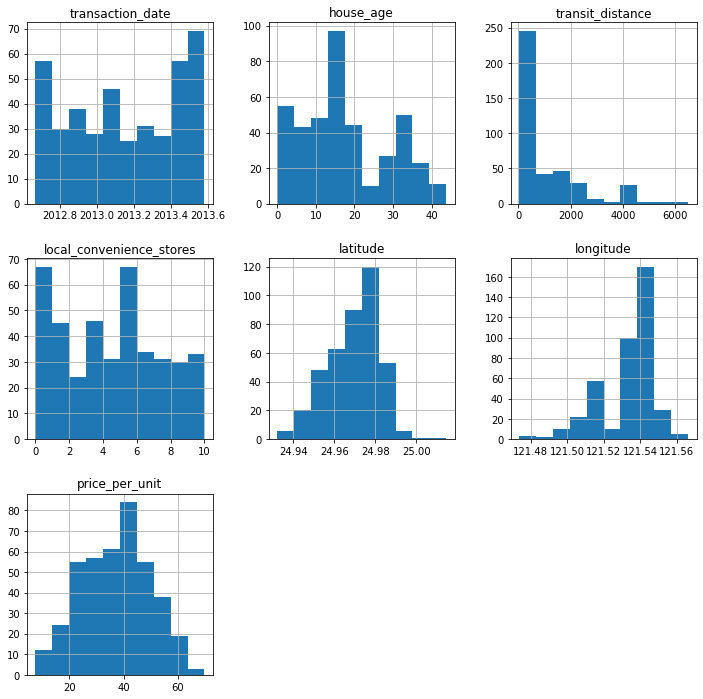

In [151]:
data.hist(figsize=(12,12))

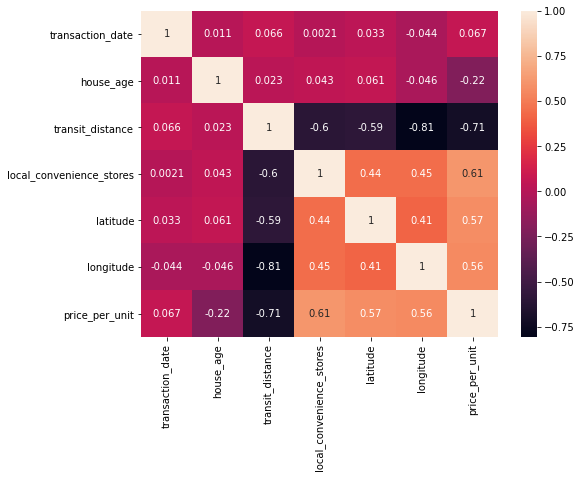

In [152]:
corr_df = data.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

### Split the data

In [153]:
from sklearn.model_selection import train_test_split

# Separate features (columns 1 [house_age] to the last but one) and labels (the last column)
X, y = data[data.columns[1:-1]].values, data[data.columns[-1]].values

X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.30, random_state=0)

### Use GradientBoostingRegressor

In [154]:
from sklearn.ensemble import GradientBoostingRegressor

model=GradientBoostingRegressor().fit(X_train,y_train)

## Evaluate the model

MSE :  37.59919750342154
RMSE :  6.131818449972369
R2_score :  0.6791643493776329


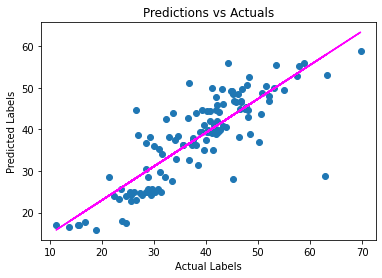

In [155]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

predictions=model.predict(X_test)
mse=mean_squared_error(y_test,predictions)
print('MSE : ',mse)
rmse=sqrt(mse)
print('RMSE : ',rmse)
r2_score=r2_score(y_test,predictions)
print('R2_score : ',r2_score)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## Using random forest regressor

In [156]:
from sklearn.ensemble import RandomForestRegressor

model1=RandomForestRegressor().fit(X_train,y_train)

MSE :  36.927677104545126
RMSE :  6.076814716983325
R2_score :  0.6848944632732845


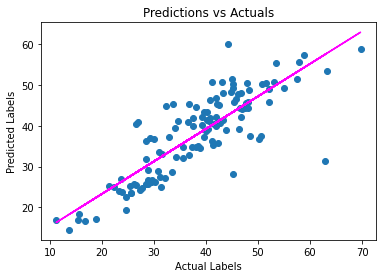

In [157]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

predictions=model1.predict(X_test)
mse=mean_squared_error(y_test,predictions)
print('MSE : ',mse)
rmse=sqrt(mse)
print('RMSE : ',rmse)
r2_score=r2_score(y_test,predictions)
print('R2_score : ',r2_score)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Predictions vs Actuals')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

As we can see RandomForestRegressor is more efficient then GradientBoostingRegressor

Let's save the trained model, and then use it to predict the price-per-unit for the following real estate transactions:

#### transaction_date	house_age	transit_distance	local_convenience_stores	latitude	longitude

2013.167	             16.2	          289.3248	       5	       24.98203	        121.54348

2013.000	  13.6	  4082.015	  0	  24.94155	  121.5038

In [158]:
import joblib

# Save the model as a pickle file
filename = './real_estate_model.pkl'
joblib.dump(model, filename)

# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features for each transaction (don't include the transaction date)
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

# Use the model to predict unit price
results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
49.45
16.9


In [159]:
import joblib

# Save the model as a pickle file
filename = './real_estate_model.pkl'
joblib.dump(model1, filename)

# Load the model from the file
loaded_model = joblib.load(filename)

# An array of features for each transaction (don't include the transaction date)
X_new = np.array([[16.2,289.3248,5,24.98203,121.54348],
                  [13.6,4082.015,0,24.94155,121.5038]])

# Use the model to predict unit price
results = loaded_model.predict(X_new)
print('Predictions:')
for prediction in results:
    print(round(prediction,2))

Predictions:
49.27
16.89
